In [26]:
# Install python-binance library and import crypto data from Binance API.
from binance.client import Client
import pandas as pd
import config
import matplotlib.pyplot as plt

In [2]:
api_key = config.api_key
api_secret = config.api_secret

In [3]:
client = Client(api_key, api_secret)

In [4]:
# Fetch the data

import requests

# Function to get top 100 cryptocurrencies from CoinGecko
def get_top_200_cryptos():
    url = 'https://api.coingecko.com/api/v3/coins/markets'
    params = {
        'vs_currency': 'usd',
        'order': 'market_cap_desc',
        'per_page': 200,
        'page': 1,
        'sparkline': False
    }
    response = requests.get(url, params=params)
    data = response.json()
    top_200_cryptos = {coin['name']: coin['symbol'].upper() + 'USDT' for coin in data}
    return top_200_cryptos

# Function to fetch historical data from Binance
def fetch_historical_data(symbol, start_date):
    interval = Client.KLINE_INTERVAL_1DAY
    klines = client.get_historical_klines(symbol, interval, start_date)
    df = pd.DataFrame(klines, columns=[
        'timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume',
        'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'
    ])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

In [5]:
# Main execution

start_date = "1 January 2019"
top_200_cryptos = get_top_200_cryptos()
historical_data = {}

for name, symbol in top_200_cryptos.items():
    try:
        df = fetch_historical_data(symbol, start_date)
        historical_data[name] = df
        print(f"Fetched data for {name} ({symbol})")
    except Exception as e:
        print(f"Could not fetch data for {name} ({symbol}): {e}")

# Print sample data from the first cryptocurrency
first_crypto_name = next(iter(historical_data))
print(historical_data[first_crypto_name].tail())

Fetched data for Bitcoin (BTCUSDT)
Fetched data for Ethereum (ETHUSDT)
Could not fetch data for Tether (USDTUSDT): APIError(code=-1121): Invalid symbol.
Fetched data for BNB (BNBUSDT)
Fetched data for Solana (SOLUSDT)
Could not fetch data for Lido Staked Ether (STETHUSDT): APIError(code=-1121): Invalid symbol.
Fetched data for USDC (USDCUSDT)
Fetched data for XRP (XRPUSDT)
Fetched data for Dogecoin (DOGEUSDT)
Could not fetch data for Toncoin (TONUSDT): APIError(code=-1121): Invalid symbol.
Fetched data for Cardano (ADAUSDT)
Fetched data for Shiba Inu (SHIBUSDT)
Fetched data for Avalanche (AVAXUSDT)
Fetched data for Chainlink (LINKUSDT)
Fetched data for Wrapped Bitcoin (WBTCUSDT)
Fetched data for TRON (TRXUSDT)
Fetched data for Polkadot (DOTUSDT)
Fetched data for Bitcoin Cash (BCHUSDT)
Fetched data for NEAR Protocol (NEARUSDT)
Fetched data for Uniswap (UNIUSDT)
Fetched data for Polygon (MATICUSDT)
Fetched data for Litecoin (LTCUSDT)
Fetched data for Pepe (PEPEUSDT)
Fetched data for Inte

In [6]:
len(historical_data.keys())

139

In [7]:
# Count how many crypto we will have with changing start datetime.
from datetime import datetime

count = 0
matching_keys = []
threshold_date = datetime.strptime('2021-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')

for key, df in historical_data.items():
    first_cell = df.iloc[0, 0]
    # Convert first cell to datetime if it is not already
    if isinstance(first_cell, str):
        first_cell = datetime.strptime(first_cell, '%Y-%m-%d %H:%M:%S')
    elif isinstance(first_cell, pd.Timestamp):
        first_cell = first_cell.to_pydatetime()

    if first_cell > threshold_date:
        count += 1
        matching_keys.append(key)

print("Count:", count)
print("Matching keys:", matching_keys)

Count: 75
Matching keys: ['Shiba Inu', 'Wrapped Bitcoin', 'Pepe', 'Internet Computer', 'Aptos', 'Render', 'Immutable', 'Arbitrum', 'dogwifhat', 'First Digital USD', 'Arweave', 'Optimism', 'Bittensor', 'Sui', 'Notcoin', 'FLOKI', 'Celestia', 'Lido DAO', 'Bonk', 'JasmyCoin', 'Pyth Network', 'GALA', 'Jupiter', 'Sei', 'Starknet', 'Ethena', 'Quant', 'Flow', 'Wormhole', 'SingularityNET', 'Worldcoin', 'ORDI', 'Mina Protocol', 'Pendle', 'eCash', 'BOOK OF MEME', 'Aevo', 'Gnosis', 'Conflux', 'Ethereum Name Service', 'Klaytn', 'ApeCoin', 'NEXO', 'DeXe', 'Axelar', 'MANTRA', 'Livepeer', 'PancakeSwap', 'Nervos Network', 'Terra Luna Classic', 'Blur', 'WOO', 'Bitcoin Gold', 'Manta Network', 'ConstitutionDAO', 'Dymension', 'AltLayer', 'Memecoin', 'Osmosis', 'Arkham', 'Illuvium', 'Ether.fi', 'Trust Wallet', 'Golem', 'Astar', 'GMT', 'Biconomy', 'SuperVerse', 'Raydium', 'Celo', 'Polymesh', 'Metis', 'Jito', 'Galxe', 'Rocket Pool']


In [8]:
import pandas as pd
from datetime import datetime

# Set the threshold dates for filtering and trimming
threshold_start_date = datetime.strptime('2021-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
threshold_end_date = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# Step 1: Filter DataFrames that do not start after the threshold date
filtered_historical_data = {}
for key, df in historical_data.items():
    if not df.empty:
        first_cell = df.iloc[0, 0]
        if (isinstance(first_cell, str) and datetime.strptime(first_cell, '%Y-%m-%d %H:%M:%S') <= threshold_start_date) or (isinstance(first_cell, pd.Timestamp) and first_cell.to_pydatetime() <= threshold_start_date):
            filtered_historical_data[key] = df

In [9]:
filtered_historical_data['Bitcoin']

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2019-01-01,3701.23000000,3810.16000000,3642.00000000,3797.14000000,23741.68703300,1546387199999,88149249.09230461,154227,12919.15589900,47973435.86685800,0
1,2019-01-02,3796.45000000,3882.14000000,3750.45000000,3858.56000000,35156.46336900,1546473599999,133876627.24651060,218538,17921.60011400,68277897.66105788,0
2,2019-01-03,3857.57000000,3862.74000000,3730.00000000,3766.78000000,29406.94835900,1546559999999,111657372.69526468,199812,14793.08326700,56172495.42692984,0
3,2019-01-04,3767.20000000,3823.64000000,3703.57000000,3792.01000000,29519.55467100,1546646399999,111034550.64066196,192232,15579.30325800,58616203.97789647,0
4,2019-01-05,3790.09000000,3840.99000000,3751.00000000,3770.96000000,30490.66775100,1546732799999,115893501.27515878,203673,14908.91417500,56667455.38615935,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1975,2024-05-29,68398.40000000,68935.68000000,67124.65000000,67652.42000000,23159.83149000,1717027199999,1573095221.64839840,1221044,11748.55954000,797928379.36691790,0
1976,2024-05-30,67652.41000000,69500.00000000,67128.00000000,68352.17000000,28478.21840000,1717113599999,1945001081.52158660,1272851,14074.36655000,961595245.17878340,0
1977,2024-05-31,68352.17000000,69044.10000000,66670.00000000,67540.01000000,26690.32184000,1717199999999,1812659052.24967660,1177860,13258.10182000,900414200.11617690,0
1978,2024-06-01,67540.01000000,67900.00000000,67428.44000000,67766.85000000,8837.66133000,1717286399999,598305207.99320460,638484,4235.27045000,286752060.40289290,0


In [10]:
# Step 2: Trim DataFrames to start from the threshold date if they have older data
for key, df in filtered_historical_data.items():
    if not df.empty:
        # Ensure the first column is a datetime object
        if isinstance(df.iloc[0, 0], str):
            df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])

        # Filter rows to start from the threshold date
        filtered_historical_data[key] = df[df.iloc[:, 0] >= threshold_start_date]

In [11]:
# Step 3: Remove DataFrames with incorrect start or end dates or length not equal to len
for key, df in filtered_historical_data.items():
    if not df.empty:
        start_date = df.iloc[0, 0]
        end_date = df.iloc[-1, 0]
        difference = datetime.today() - start_date
        number_of_days = difference.days
        if start_date == threshold_start_date and end_date == threshold_end_date and len(df) == number_of_days:
            filtered_historical_data[key] = df

In [12]:
for key, df in filtered_historical_data.items():
    if not df.empty:
        print(f'{key} -start: {df.iloc[0,0]} to end: {df.iloc[-1, 0]}, length: {len(df)}')

Bitcoin -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
Ethereum -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
BNB -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
Solana -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
USDC -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1084
XRP -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
Dogecoin -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
Cardano -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
Avalanche -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
Chainlink -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
TRON -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
Polkadot -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
Bitcoin Cash -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, le

In [13]:
# List of keys to exclude
exclude_keys = ['USDC', 'Monero', 'Beam', 'BitTorrent', 'Helium', 'TrueUSD', 'Terra']

# Create a new dictionary to store the filtered data
filtered_historical_data_corrected = {}

for key, df in filtered_historical_data.items():
    if not df.empty:
        # Check if the key is not in the exclude list
        if key not in exclude_keys:
            filtered_historical_data_corrected[key] = df

# Update the original dictionary to only include valid DataFrames
filtered_historical_data = filtered_historical_data_corrected

In [14]:
for key, df in filtered_historical_data.items():
    if not df.empty:
        print(f'{key} -start: {df.iloc[0,0]} to end: {df.iloc[-1, 0]}, length: {len(df)}')

Bitcoin -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
Ethereum -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
BNB -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
Solana -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
XRP -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
Dogecoin -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
Cardano -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
Avalanche -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
Chainlink -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
TRON -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
Polkadot -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
Bitcoin Cash -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
NEAR Protocol -start: 2021-01-01 00:00:00 to end: 2024-06-02 00:

In [15]:
historical_data = filtered_historical_data

In [16]:
# Output the remaining keys to confirm
print("Remaining keys:", list(historical_data.keys()))
print(len(historical_data.keys()))

# Optional: Print start and end dates and length of each DataFrame to verify
for key, df in historical_data.items():
    if not df.empty:
        print(f'{key} - start: {df.iloc[0, 0]} to end: {df.iloc[-1, 0]}, length: {len(df)}')

Remaining keys: ['Bitcoin', 'Ethereum', 'BNB', 'Solana', 'XRP', 'Dogecoin', 'Cardano', 'Avalanche', 'Chainlink', 'TRON', 'Polkadot', 'Bitcoin Cash', 'NEAR Protocol', 'Uniswap', 'Polygon', 'Litecoin', 'Fetch.ai', 'Ethereum Classic', 'Hedera', 'Filecoin', 'Cosmos Hub', 'Stellar', 'The Graph', 'Stacks', 'Maker', 'VeChain', 'Injective', 'Fantom', 'Theta Network', 'THORChain', 'EOS', 'Aave', 'Algorand', 'Chiliz', 'Axie Infinity', 'MultiversX', 'NEO', 'The Sandbox', 'Tezos', 'Synthetix Network', 'Decentraland', 'Kava', 'IOTA', 'Oasis Network', 'Theta Fuel', 'Ocean Protocol', 'IoTeX', '1inch', 'Curve DAO', 'Enjin Coin', 'Holo', 'Ankr Network', 'PAX Gold', '0x Protocol', 'Zilliqa', 'Reserve Rights']
56
Bitcoin - start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
Ethereum - start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
BNB - start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00, length: 1249
Solana - start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:0

In [17]:
for df in historical_data.values():
    print(len(df))

1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249
1249


In [18]:
# Optional: Print start and end dates of each DataFrame to verify
for key, df in historical_data.items():
    print(f'{key} - start: {df.iloc[0, 0]} to end: {df.iloc[-1, 0]}')

Bitcoin - start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00
Ethereum - start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00
BNB - start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00
Solana - start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00
XRP - start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00
Dogecoin - start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00
Cardano - start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00
Avalanche - start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00
Chainlink - start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00
TRON - start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00
Polkadot - start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00
Bitcoin Cash - start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00
NEAR Protocol - start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00
Uniswap - start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00
Polygon - start: 2021-01-01 00:00:00 to end: 2024-06-02 00:00:00
Litecoin - start: 2

In [19]:
# Assuming you have a dictionary of DataFrames where each DataFrame represents data for a coin
# The dictionary keys represent the coin names

# Initialize an empty dictionary to store integral of paths for each coin
daily_percent_change_dict = {}

# Compute the daily change for each coin
for coin, df in historical_data.items():
    daily_percent_changes_list = []  # Create a new list for each coin
    for i in range(len(df)-1):
        # Assuming the 5th column is index 4
        daily_change = (float(df.iloc[i+1, 4]) - float(df.iloc[i, 4])) / float(df.iloc[i, 4]) * 100
        daily_percent_changes_list.append(round(daily_change, 2))  # Round to 2 decimal places
    daily_percent_change_dict[coin] = daily_percent_changes_list

In [20]:
daily_percent_change_dict['Solana']

[-2.29,
 21.0,
 14.37,
 -13.14,
 -10.27,
 21.74,
 36.3,
 5.01,
 1.95,
 -10.07,
 17.21,
 -3.06,
 -6.59,
 -1.35,
 5.46,
 11.74,
 -1.05,
 -4.18,
 2.42,
 -19.55,
 11.55,
 5.18,
 3.42,
 2.09,
 9.1,
 -9.06,
 3.67,
 0.51,
 10.41,
 0.58,
 8.52,
 13.4,
 9.52,
 11.82,
 4.56,
 -8.63,
 9.39,
 17.28,
 -0.69,
 16.53,
 1.21,
 -0.0,
 -4.96,
 -0.32,
 1.56,
 -6.23,
 -0.78,
 9.0,
 28.01,
 -13.09,
 10.9,
 30.19,
 5.58,
 12.77,
 -19.37,
 -1.79,
 -2.98,
 -0.78,
 14.49,
 -6.95,
 0.94,
 -7.27,
 -3.93,
 4.02,
 5.94,
 -1.55,
 9.09,
 -4.27,
 12.86,
 -9.18,
 5.11,
 -5.51,
 -2.09,
 -3.66,
 4.12,
 0.02,
 -0.34,
 0.24,
 1.04,
 3.2,
 -4.33,
 -3.94,
 -4.55,
 13.77,
 11.46,
 9.76,
 4.9,
 0.62,
 1.67,
 -1.76,
 3.71,
 13.92,
 5.67,
 -3.38,
 9.07,
 5.92,
 1.51,
 2.52,
 -2.95,
 3.92,
 2.48,
 -3.82,
 -3.8,
 5.21,
 -8.93,
 -1.78,
 30.12,
 -2.67,
 0.74,
 2.68,
 19.5,
 -3.88,
 9.23,
 16.07,
 -7.44,
 -1.67,
 3.91,
 -5.24,
 0.71,
 16.09,
 -5.58,
 -2.1,
 -7.14,
 5.5,
 -3.3,
 -0.72,
 5.63,
 -2.81,
 -3.33,
 3.93,
 -1.86,
 -6.09,
 4

In [21]:
daily_percent_change_dict['BNB']

[1.21,
 7.91,
 -0.3,
 1.67,
 1.0,
 3.15,
 -2.79,
 3.52,
 -3.3,
 -9.99,
 0.23,
 4.86,
 4.39,
 -2.4,
 5.57,
 6.32,
 -1.15,
 -6.21,
 0.19,
 -9.32,
 5.85,
 0.04,
 2.24,
 0.02,
 0.01,
 -2.29,
 4.02,
 0.79,
 4.49,
 -1.02,
 16.13,
 -0.91,
 2.18,
 7.37,
 20.98,
 7.59,
 -6.15,
 16.8,
 34.46,
 20.14,
 -3.79,
 10.1,
 -2.39,
 1.88,
 -4.09,
 -0.09,
 26.99,
 18.31,
 70.3,
 -24.05,
 16.7,
 -9.4,
 -13.51,
 10.0,
 -7.7,
 -5.62,
 1.65,
 -6.73,
 21.29,
 -5.99,
 0.37,
 -4.54,
 -1.81,
 0.4,
 6.06,
 0.18,
 21.89,
 -5.03,
 4.16,
 -9.24,
 4.96,
 -4.72,
 -3.31,
 1.58,
 4.35,
 -3.08,
 0.56,
 0.52,
 0.13,
 -3.72,
 0.26,
 -2.72,
 -5.87,
 9.09,
 5.49,
 -0.3,
 2.56,
 13.08,
 -2.87,
 10.72,
 1.04,
 -4.83,
 8.36,
 5.49,
 9.6,
 -6.89,
 11.49,
 8.43,
 3.81,
 11.59,
 13.46,
 -7.55,
 -0.29,
 -1.48,
 -6.2,
 1.26,
 -6.46,
 4.69,
 16.33,
 -7.29,
 -7.06,
 4.21,
 -5.61,
 1.61,
 6.01,
 6.25,
 -1.05,
 6.56,
 3.83,
 -0.43,
 0.29,
 8.74,
 -9.89,
 6.86,
 -2.63,
 -1.53,
 3.49,
 2.42,
 -4.63,
 6.47,
 -11.5,
 -3.96,
 5.52,
 -6.51,
 0

In [63]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming daily_change_dict is your dictionary with coin names as keys and daily changes list as values

# Determine the maximum length of daily change lists
max_length = max(len(changes) for changes in daily_percent_change_dict.values())

# Pad or truncate daily change lists to the maximum length
padded_daily_changes = []
for changes in daily_percent_change_dict.values():
    padded_changes = changes + [0] * (max_length - len(changes))  # Pad with zeros
    # Alternatively, you can truncate longer lists by uncommenting the line below
    # padded_changes = changes[:max_length]
    padded_daily_changes.append(padded_changes)

# Prepare data
coins = list(daily_percent_change_dict.keys())
X = np.array(padded_daily_changes)  # Convert values to numpy array

# Choose the number of clusters (k)
k = 7  # You can adjust this number based on your data and requirements

# Initialize and fit KMeans model
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Print clustering results
for i in range(k):
    cluster_coins = [coins[j] for j in range(len(coins)) if cluster_labels[j] == i]
    print(f'Cluster {i+1}: {cluster_coins}')


Cluster 1: ['Bitcoin', 'Ethereum', 'BNB', 'XRP', 'Cardano', 'TRON', 'Bitcoin Cash', 'Litecoin', 'Ethereum Classic', 'Stellar', 'Maker', 'EOS', 'PAX Gold']
Cluster 2: ['Dogecoin']
Cluster 3: ['The Sandbox', 'Decentraland']
Cluster 4: ['Cosmos Hub']
Cluster 5: ['Solana', 'Avalanche', 'Chainlink', 'Polkadot', 'NEAR Protocol', 'Uniswap', 'Polygon', 'Fetch.ai', 'Hedera', 'Filecoin', 'The Graph', 'Stacks', 'VeChain', 'Injective', 'Fantom', 'THORChain', 'Aave', 'Algorand', 'Axie Infinity', 'MultiversX', 'NEO', 'Tezos', 'Synthetix Network', 'Kava', 'IOTA', 'Oasis Network', 'Ocean Protocol', '1inch', 'Curve DAO', 'Enjin Coin', 'Holo', 'Ankr Network', '0x Protocol', 'Zilliqa', 'Reserve Rights']
Cluster 6: ['Theta Network', 'Chiliz', 'Theta Fuel']
Cluster 7: ['IoTeX']


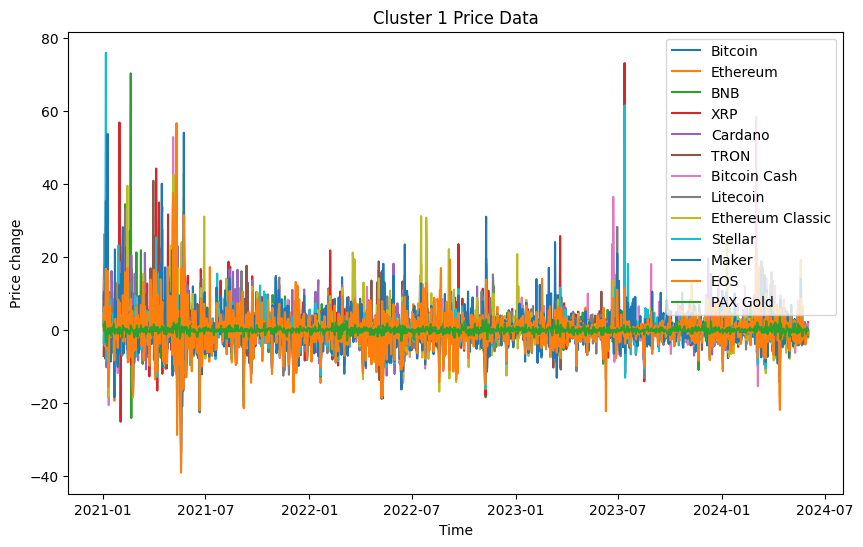

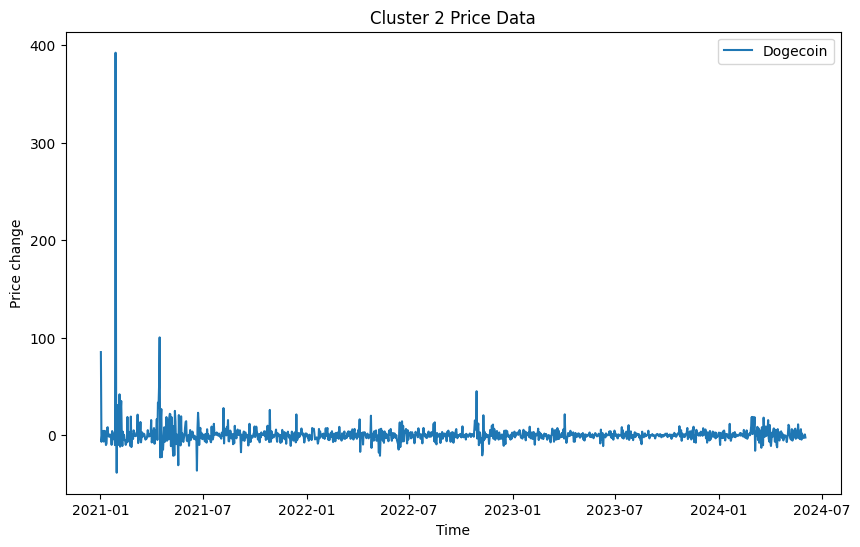

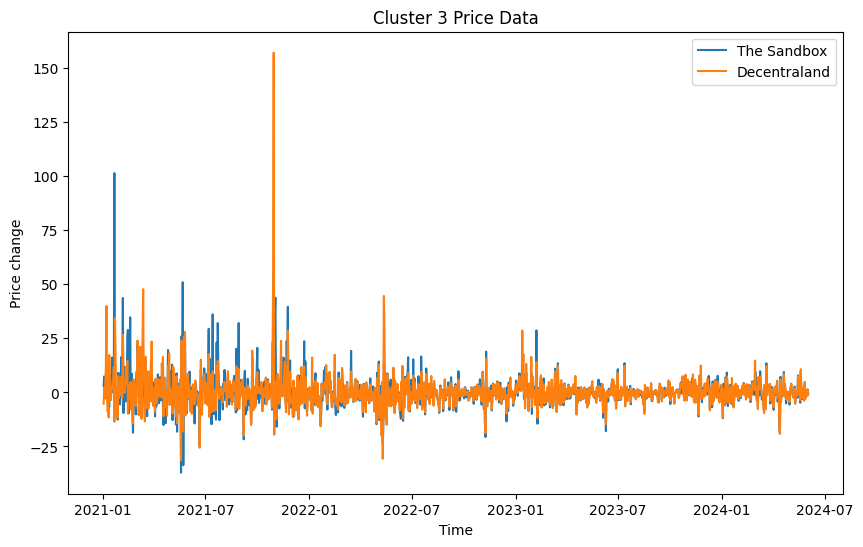

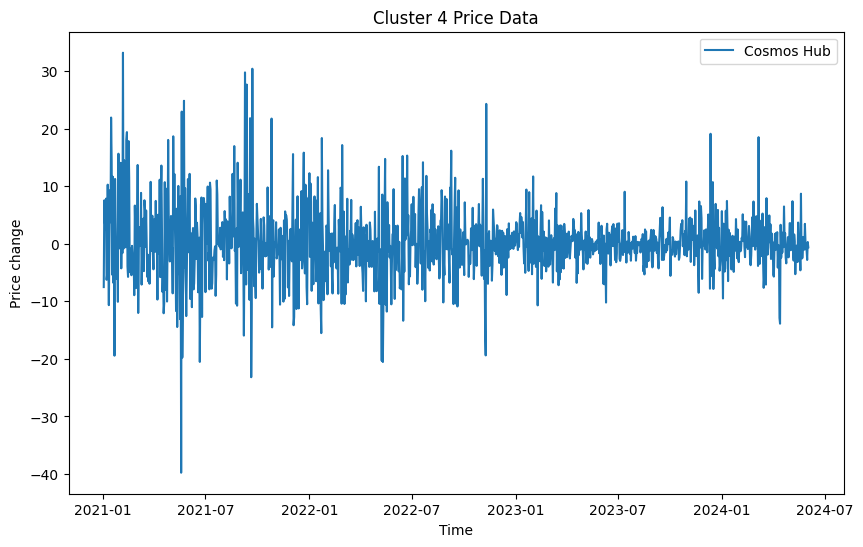

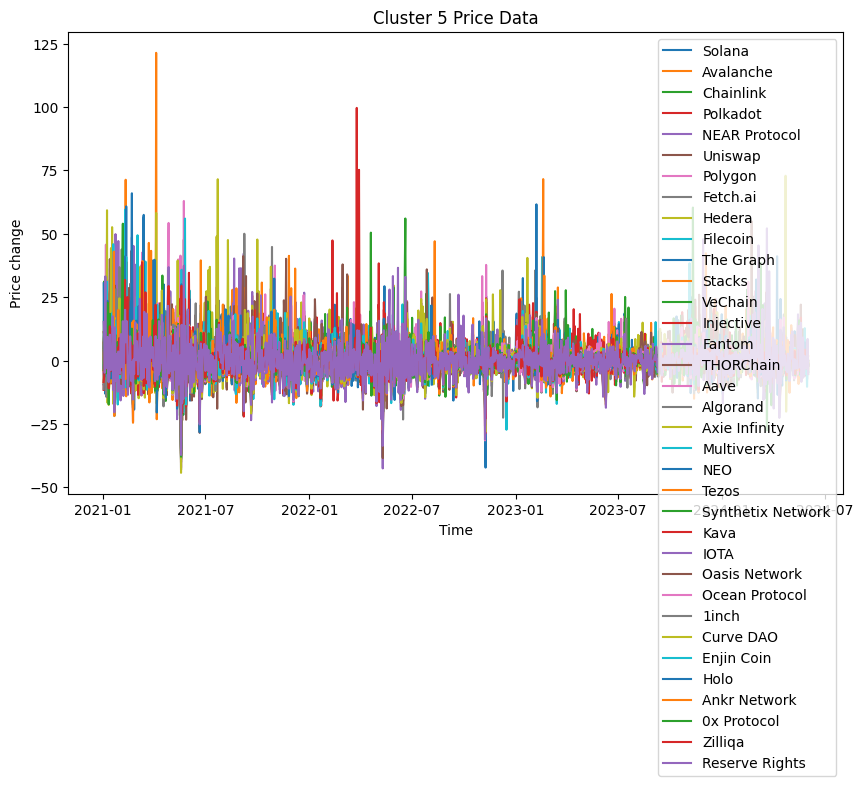

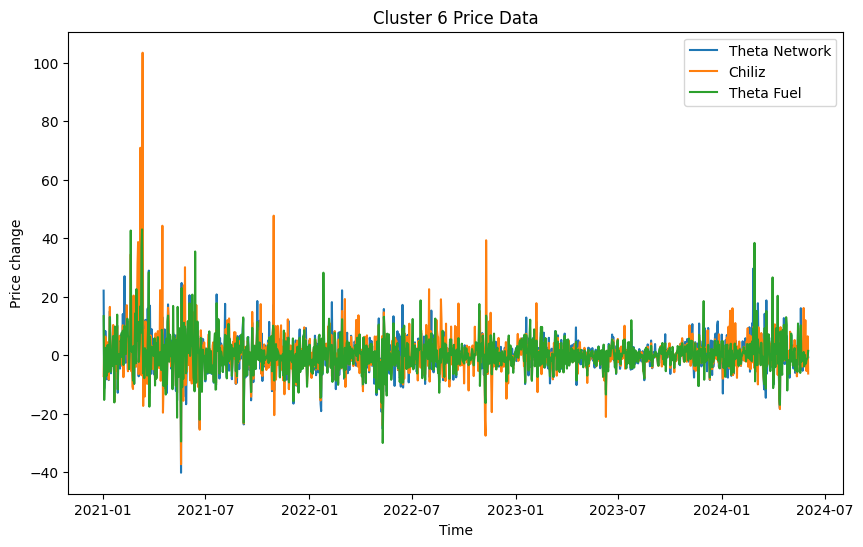

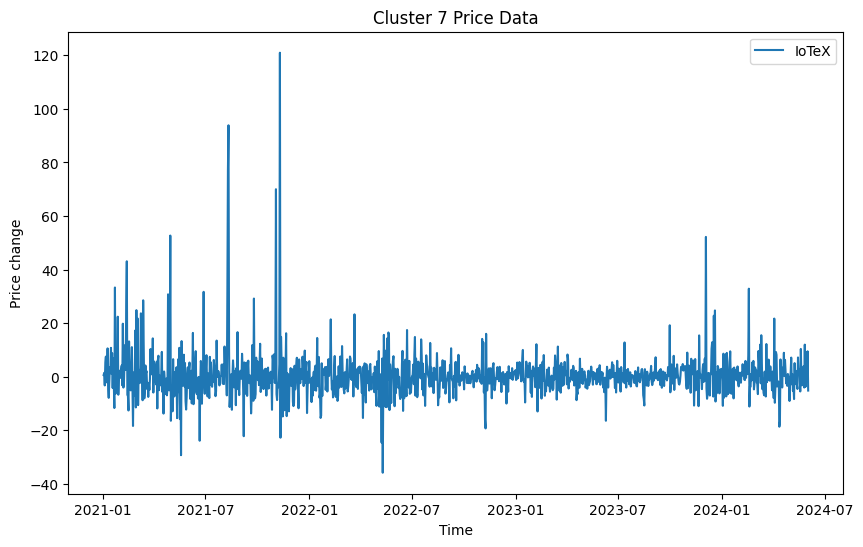

In [64]:
# Plot actual price data for each cluster

for i in range(k):
    cluster_coins = [coins[j] for j in range(len(coins)) if cluster_labels[j] == i]
    plt.figure(figsize=(10, 6))
    for coin in cluster_coins:
        timestamps = filtered_historical_data[coin]['timestamp'][1:]
        plt.plot(timestamps, daily_percent_change_dict[coin], label=coin)
    plt.title(f'Cluster {i+1} Price Data')
    plt.xlabel('Time')
    plt.ylabel('Price change')
    plt.legend()
    plt.show()